<a href="https://colab.research.google.com/github/nitsundon/100DaysofML/blob/main/Day01/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import numpy as np

In [24]:
df= pd.read_pickle("/content/drive/MyDrive/Libraries/pickle/preprocessed_demand_df.pkl")
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)
df.head()


,demand
datetime,
2022-01-01 00:00:00,15798.000000
2022-01-01 00:15:00,15775.333333
2022-01-01 00:30:00,15667.285714
2022-01-01 00:45:00,15813.000000
2022-01-01 01:00:00,15837.000000


In [25]:
df.loc[df['demand'] < 10000, 'demand'] = np.nan

In [36]:
df1=df.interpolate()

<Axes: xlabel='datetime'>

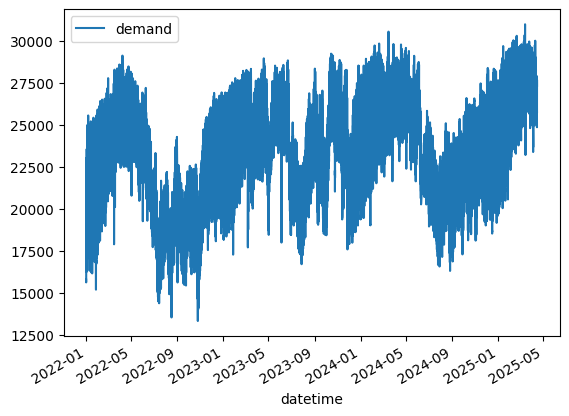

In [37]:
df1.plot()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
df1 = df1[~df1.index.duplicated(keep='first')]

df1.asfreq('15min')

,demand
datetime,
2022-01-01 00:00:00,15798.000000
2022-01-01 00:15:00,15775.333333
2022-01-01 00:30:00,15667.285714
2022-01-01 00:45:00,15813.000000
2022-01-01 01:00:00,15837.000000
...,...
2025-04-14 12:00:00,27577.111111
2025-04-14 12:15:00,27454.333333
2025-04-14 12:30:00,27330.857143


In [43]:
seasonal_decompose(df1['demand'])

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None